# [국가통계포털 KOSIS 💰 경기종합지수 분석하기](https://www.youtube.com/watch?v=c62S-WZtVJ4)

## [경기종합지수 통계 다운로드](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1C8015&conn_path=I2)

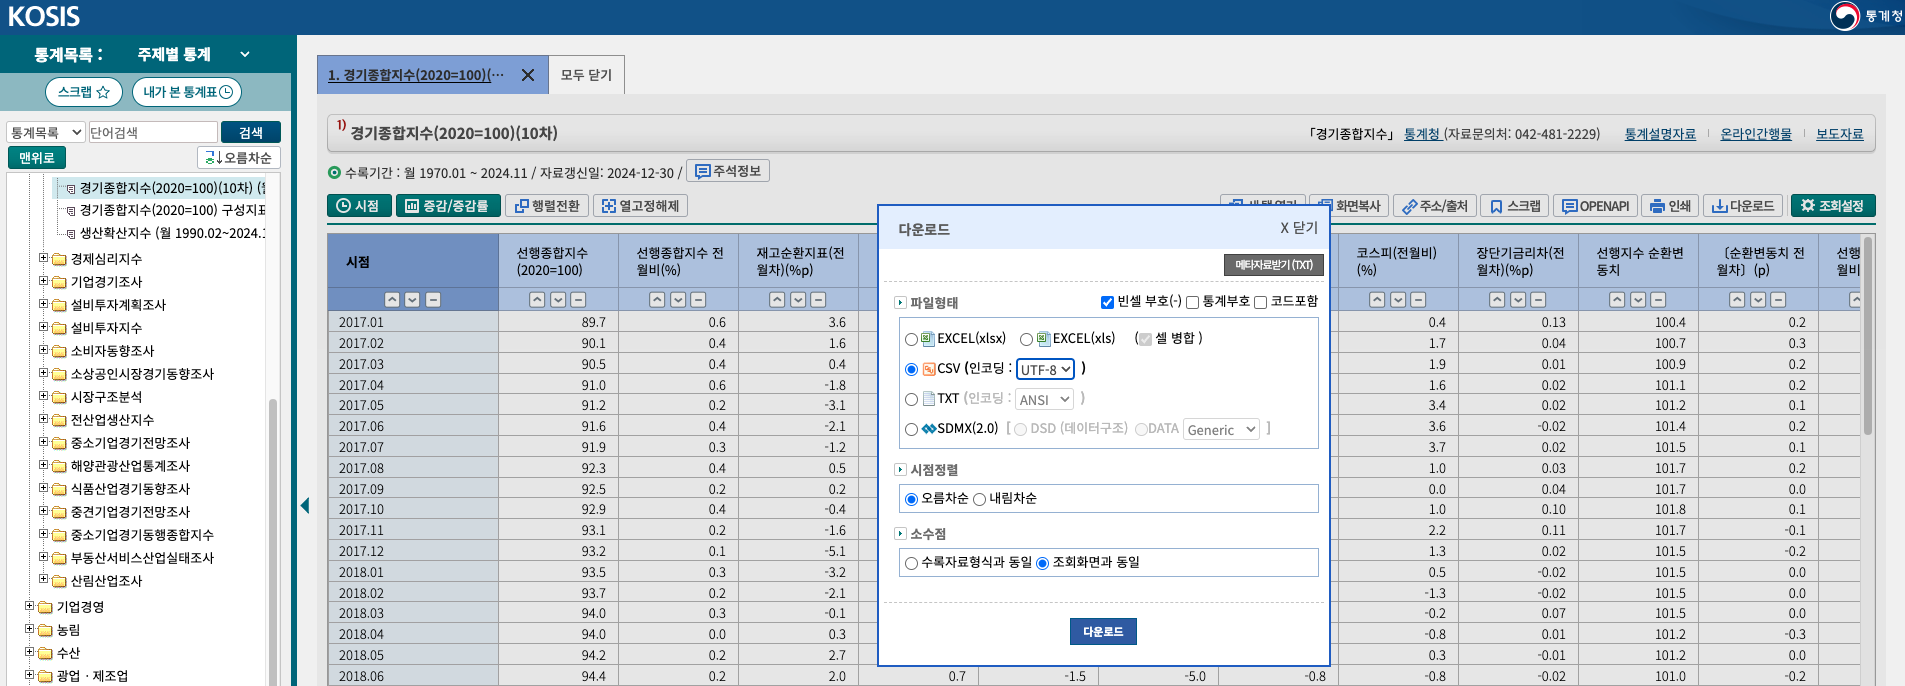

In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [4]:
df = pd.read_csv("kosis-economic.csv", index_col="시점")
df.head()

,선행종합지수(2020=100),선행종합지수 전월비(%),재고순환지표(전월차)(%p),경제심리지수(전월차)(p),기계류내수출하지수(선박제외)(전월비)(%),건설수주액(전월비)(%),수출입물가비율(전월비)(%),코스피(전월비)(%),장단기금리차(전월차)(%p),선행지수 순환변동치,...,비농림어업취업자수(전월비)(%),동행지수 순환변동치,〔순환변동치 전월차〕(p).1,후행종합지수(2020=100),후행종합지수 전월비(%),생산자제품재고지수(전월비)(%),소비자물가지수변화율(서비스)(전월차)(%p),소비재수입액(전월비)(%),취업자수(전월비)(%),CP유통수익률(전월차)(%p)
시점,,,,,,,,,,,,,,,,,,,,,
2017.01,89.7,0.6,3.6,0.0,2.2,-11.9,-0.2,0.4,0.13,100.4,...,0.1,100.7,0.4,90.8,0.2,-0.9,0.1,0.2,0.1,0.1
2017.02,90.1,0.4,1.6,0.6,0.6,19.3,-0.4,1.7,0.04,100.7,...,0.1,100.7,0.0,91.0,0.2,-0.6,0.0,0.5,0.1,0.0
2017.03,90.5,0.4,0.4,2.2,0.8,-6.8,0.1,1.9,0.01,100.9,...,0.1,100.9,0.2,91.3,0.3,0.7,0.0,1.8,0.1,0.0
2017.04,91.0,0.6,-1.8,1.3,-0.3,12.3,0.6,1.6,0.02,101.1,...,0.1,101.0,0.1,91.6,0.3,1.0,0.0,1.3,0.1,0.0
2017.05,91.2,0.2,-3.1,1.0,0.8,-16.4,0.5,3.4,0.02,101.2,...,0.1,101.1,0.1,91.8,0.2,1.5,-0.1,-0.4,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 2017.01 to 2024.11 p)
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   선행종합지수(2020=100)          95 non-null     float64
 1   선행종합지수 전월비(%)             95 non-null     float64
 2   재고순환지표(전월차)(%p)           95 non-null     float64
 3   경제심리지수(전월차)(p)            95 non-null     float64
 4   기계류내수출하지수(선박제외)(전월비)(%)   95 non-null     float64
 5   건설수주액(전월비)(%)             95 non-null     float64
 6   수출입물가비율(전월비)(%)           95 non-null     float64
 7   코스피(전월비)(%)               95 non-null     float64
 8   장단기금리차(전월차)(%p)           95 non-null     float64
 9   선행지수 순환변동치                95 non-null     float64
 10  〔순환변동치 전월차〕(p)            95 non-null     float64
 11  선행지수 전년동월비(%)             95 non-null     float64
 12  〔전년동월비 전월차〕(%p)           95 non-null     float64
 13  동행종합지수(2020=100)          95 non-null     float64
 14  동행종

## 기초 통계 분석

In [6]:
# 기초 통계 분석
df.describe()  # 데이터프레임의 기초 통계 정보 출력

,선행종합지수(2020=100),선행종합지수 전월비(%),재고순환지표(전월차)(%p),경제심리지수(전월차)(p),기계류내수출하지수(선박제외)(전월비)(%),건설수주액(전월비)(%),수출입물가비율(전월비)(%),코스피(전월비)(%),장단기금리차(전월차)(%p),선행지수 순환변동치,...,비농림어업취업자수(전월비)(%),동행지수 순환변동치,〔순환변동치 전월차〕(p).1,후행종합지수(2020=100),후행종합지수 전월비(%),생산자제품재고지수(전월비)(%),소비자물가지수변화율(서비스)(전월차)(%p),소비재수입액(전월비)(%),취업자수(전월비)(%),CP유통수익률(전월차)(%p)
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,102.796842,0.288421,-0.014737,-0.025263,-0.015789,0.660000,-0.113684,0.285263,-0.009684,100.371579,...,0.072632,99.792632,-0.028421,103.227368,0.267368,0.251579,-0.004211,0.489474,0.076842,0.024211
std,8.156520,0.242708,2.420039,2.448880,1.827992,9.659098,0.800081,2.667853,0.116733,1.081436,...,0.265154,1.204887,0.344150,8.066459,0.153292,0.967434,0.147976,1.764452,0.263952,0.171176
min,89.700000,-0.300000,-6.100000,-12.100000,-4.100000,-23.100000,-2.200000,-5.700000,-0.390000,98.500000,...,-1.300000,96.400000,-1.200000,90.800000,-0.100000,-2.200000,-0.300000,-3.300000,-1.300000,-0.500000
25%,94.800000,0.100000,-1.600000,-0.900000,-1.400000,-4.000000,-0.600000,-1.800000,-0.075000,99.500000,...,0.000000,99.400000,-0.100000,96.800000,0.200000,-0.350000,-0.100000,-0.500000,0.000000,0.000000
50%,103.200000,0.300000,0.100000,0.000000,-0.200000,0.900000,-0.100000,0.400000,0.020000,100.400000,...,0.100000,99.900000,0.000000,101.000000,0.200000,0.300000,0.000000,0.600000,0.100000,0.000000
75%,109.300000,0.400000,1.500000,0.950000,0.900000,5.800000,0.350000,1.900000,0.070000,101.200000,...,0.200000,100.750000,0.100000,111.850000,0.350000,0.750000,0.100000,1.750000,0.200000,0.100000
max,117.300000,0.900000,4.700000,6.400000,4.400000,25.000000,3.400000,9.600000,0.250000,102.800000,...,0.800000,101.400000,0.900000,116.300000,0.600000,2.900000,0.600000,4.400000,0.700000,0.800000


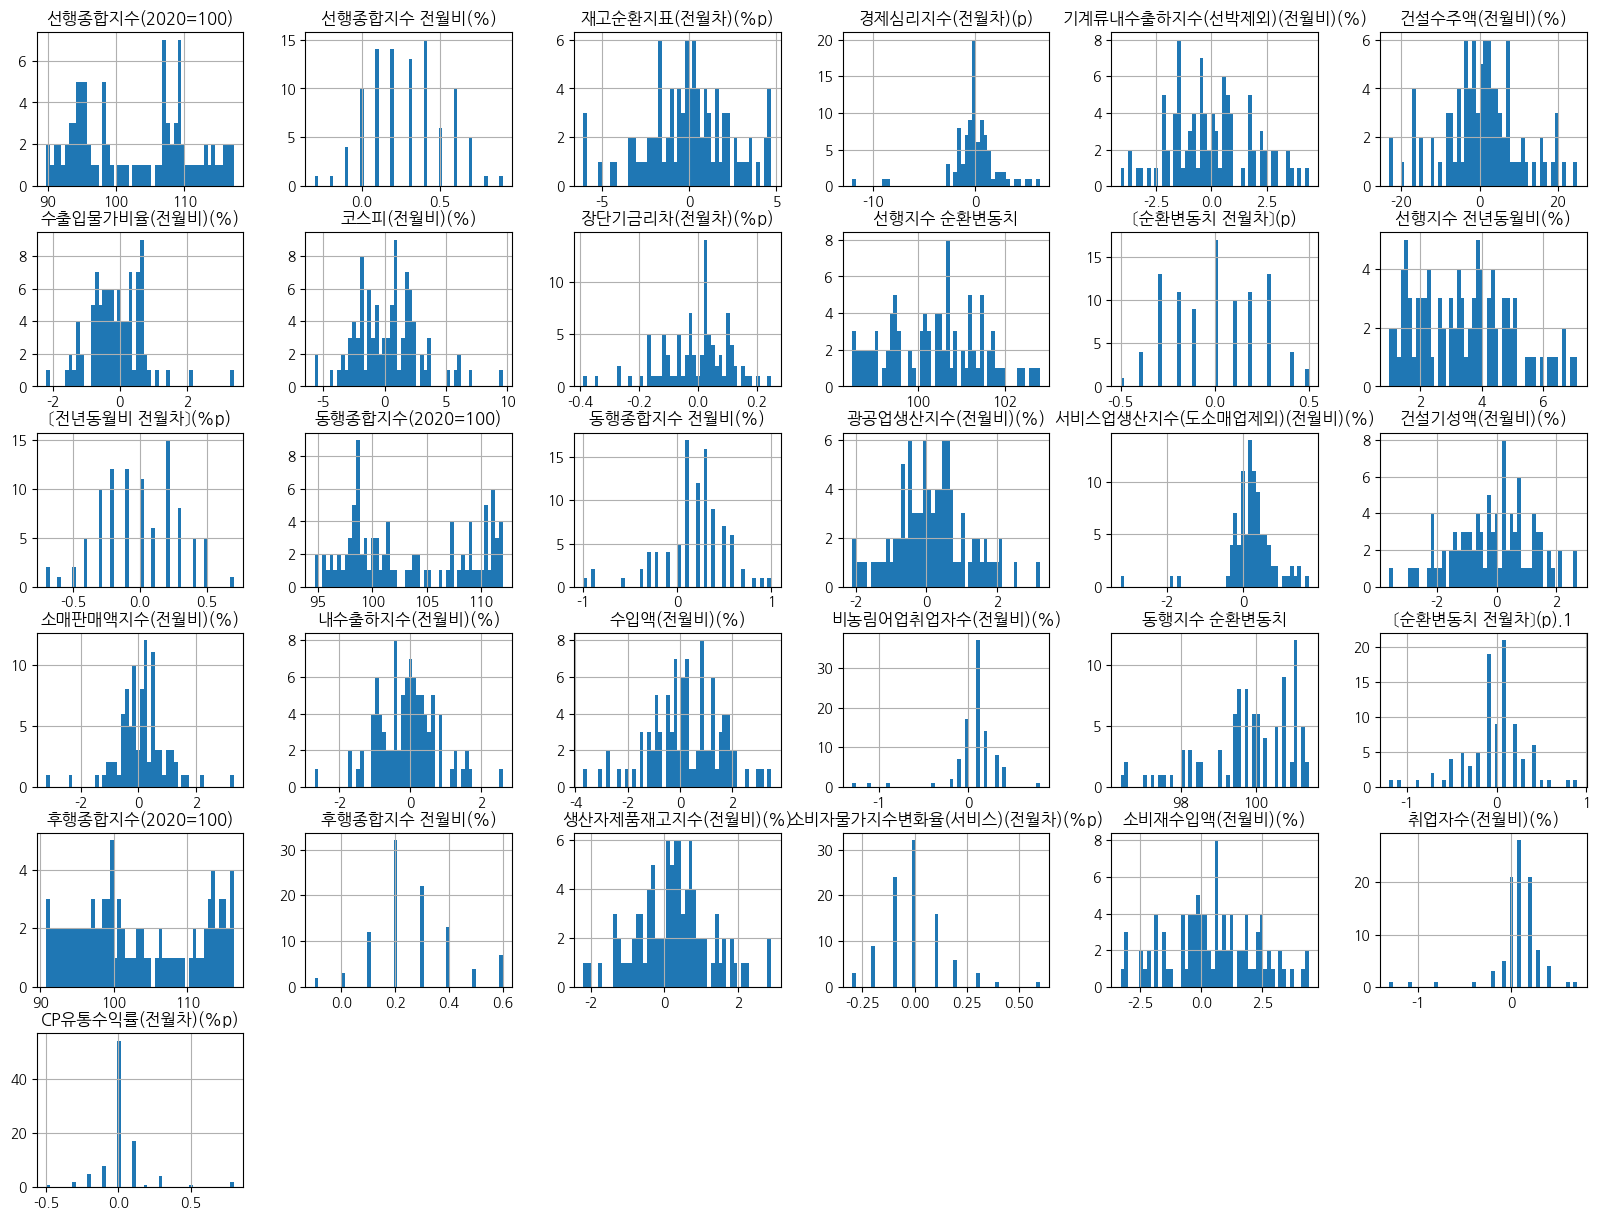

In [10]:
df.hist(figsize=(20, 15), bins=50);

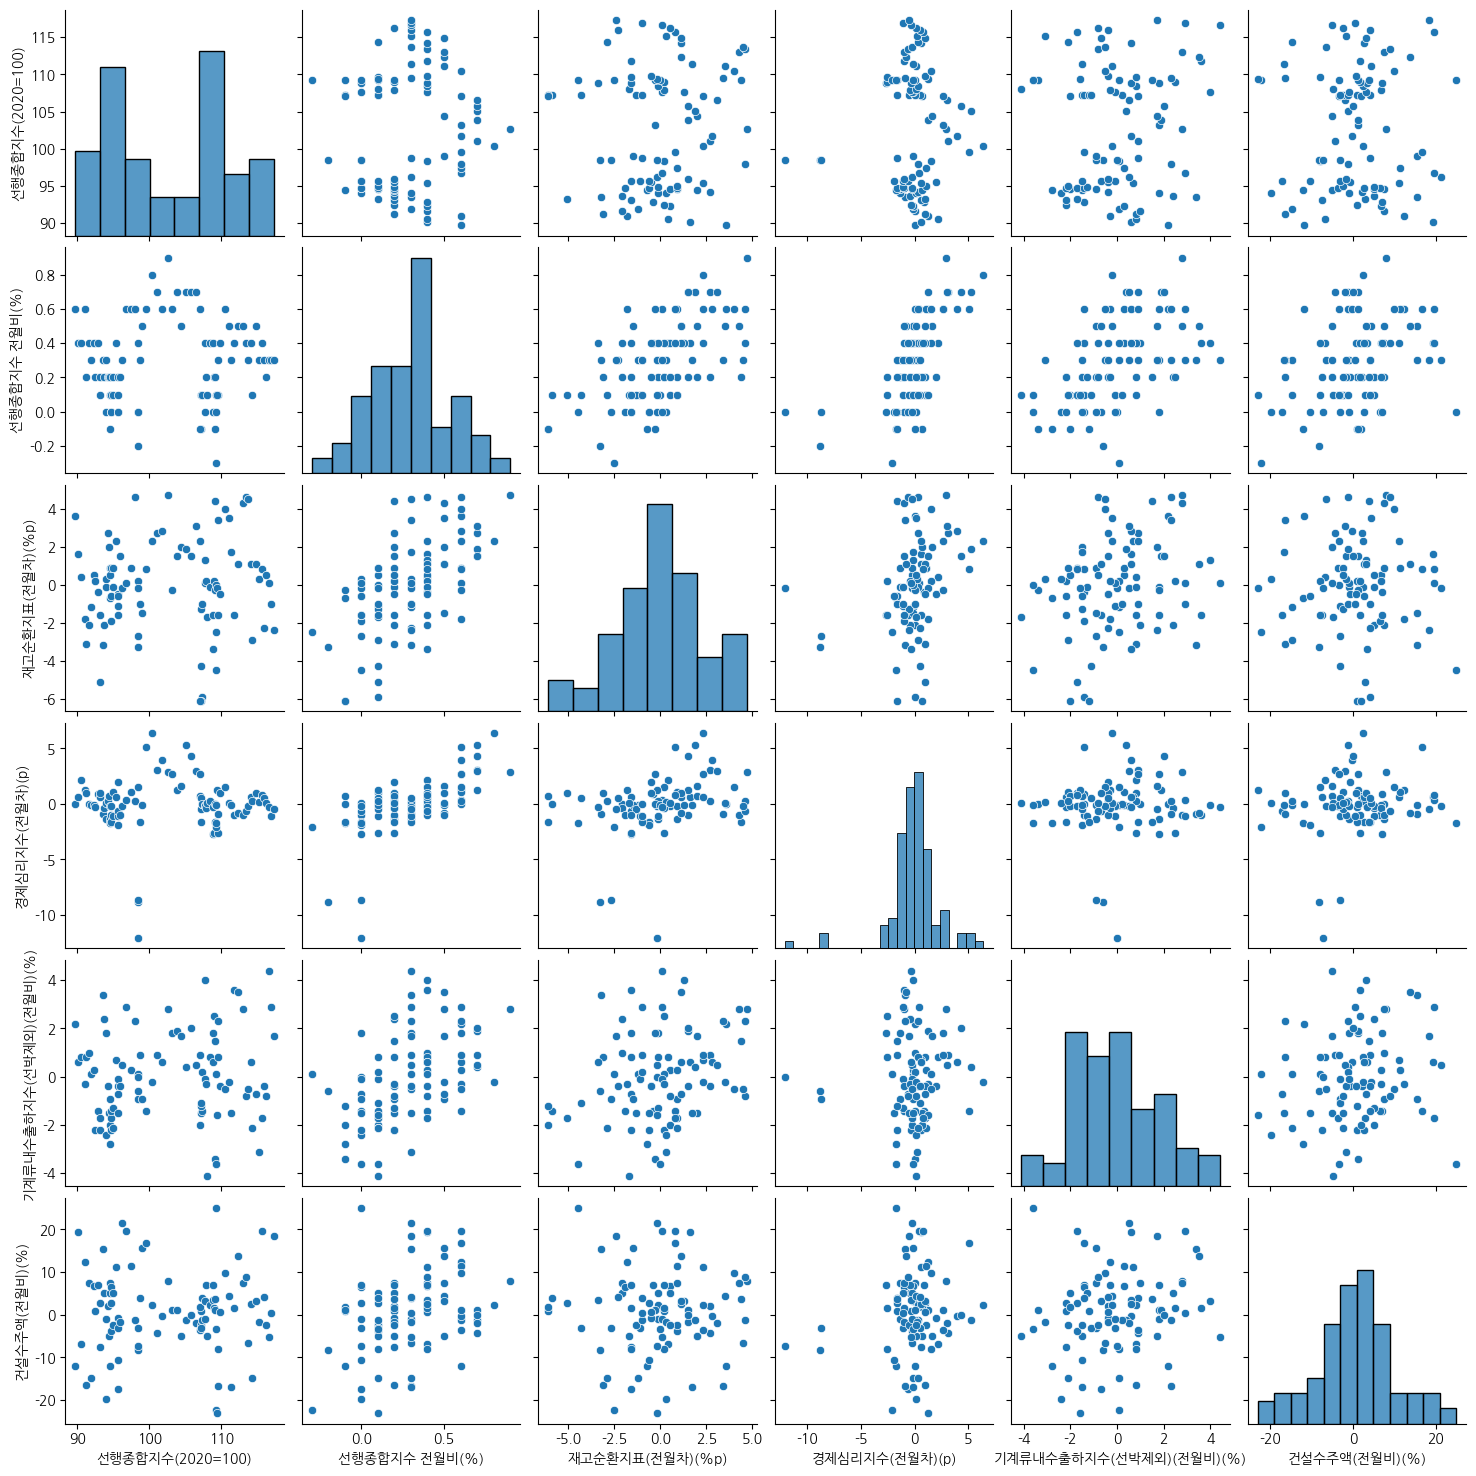

In [11]:
# 일부 변수만 사용할 경우 (예: 처음 6개 변수):
selected_columns = df.iloc[:, :6]  # 데이터프레임에서 원하는 변수 선택
sns.pairplot(selected_columns)

## 상관관계 분석

In [13]:
corr = df.corr()
corr

,선행종합지수(2020=100),선행종합지수 전월비(%),재고순환지표(전월차)(%p),경제심리지수(전월차)(p),기계류내수출하지수(선박제외)(전월비)(%),건설수주액(전월비)(%),수출입물가비율(전월비)(%),코스피(전월비)(%),장단기금리차(전월차)(%p),선행지수 순환변동치,...,비농림어업취업자수(전월비)(%),동행지수 순환변동치,〔순환변동치 전월차〕(p).1,후행종합지수(2020=100),후행종합지수 전월비(%),생산자제품재고지수(전월비)(%),소비자물가지수변화율(서비스)(전월차)(%p),소비재수입액(전월비)(%),취업자수(전월비)(%),CP유통수익률(전월차)(%p)
선행종합지수(2020=100),1.000000,0.038942,0.061658,0.019787,0.097147,0.019486,0.097461,-0.085708,-0.147808,-0.006668,...,0.135721,-0.215167,-0.059002,0.978667,0.127628,-0.109208,0.072176,-0.113313,0.086290,0.081203
선행종합지수 전월비(%),0.038942,1.000000,0.586173,0.618439,0.494491,0.335830,0.004106,0.597935,0.448839,0.137754,...,0.285963,-0.238573,0.403578,-0.024669,-0.078888,-0.553349,0.063794,0.203413,0.266447,-0.264607
재고순환지표(전월차)(%p),0.061658,0.586173,1.000000,0.297901,0.275511,0.005381,0.042091,0.232000,0.041591,-0.128938,...,0.102816,-0.033530,0.270796,0.078158,-0.213805,-0.774315,-0.061668,0.205278,0.114041,-0.142685
경제심리지수(전월차)(p),0.019787,0.618439,0.297901,1.000000,0.039977,0.117422,-0.429174,0.658358,0.146914,0.288670,...,0.726678,-0.021516,0.606803,-0.045364,0.192187,-0.199266,0.152066,0.122818,0.707935,-0.323367
기계류내수출하지수(선박제외)(전월비)(%),0.097147,0.494491,0.275511,0.039977,1.000000,0.149361,-0.001313,0.024340,0.178653,0.139849,...,0.090403,-0.024300,0.247860,0.055741,0.127981,-0.271799,0.066610,0.226540,0.069347,0.157626
건설수주액(전월비)(%),0.019486,0.335830,0.005381,0.117422,0.149361,1.000000,-0.157704,0.064242,0.053253,-0.022780,...,0.138219,-0.130210,0.039146,0.011989,0.007156,-0.109239,-0.053857,0.150083,0.151433,-0.117025
수출입물가비율(전월비)(%),0.097461,0.004106,0.042091,-0.429174,-0.001313,-0.157704,1.000000,-0.186496,-0.103380,-0.257179,...,-0.486198,-0.231851,-0.306651,0.134038,-0.360181,-0.099685,-0.267364,-0.092642,-0.499723,-0.013091
코스피(전월비)(%),-0.085708,0.597935,0.232000,0.658358,0.024340,0.064242,-0.186496,1.000000,0.087465,0.113127,...,0.192220,-0.248115,0.218297,-0.127249,-0.148422,-0.238768,0.034064,-0.066860,0.185027,-0.248470
장단기금리차(전월차)(%p),-0.147808,0.448839,0.041591,0.146914,0.178653,0.053253,-0.103380,0.087465,1.000000,0.197688,...,-0.000749,-0.112153,0.041271,-0.221956,-0.062436,-0.159629,0.120788,0.068194,-0.007701,-0.153185
선행지수 순환변동치,-0.006668,0.137754,-0.128938,0.288670,0.139849,-0.022780,-0.257179,0.113127,0.197688,1.000000,...,0.241005,0.279550,0.218761,-0.172289,0.358208,0.060901,0.432682,0.174067,0.229109,0.107774


In [19]:
corr.columns

Index(['선행종합지수(2020=100)', '선행종합지수 전월비(%)', '재고순환지표(전월차)(%p)',
       '경제심리지수(전월차)(p)', '기계류내수출하지수(선박제외)(전월비)(%)', '건설수주액(전월비)(%)',
       '수출입물가비율(전월비)(%)', '코스피(전월비)(%)', '장단기금리차(전월차)(%p)', '선행지수 순환변동치',
       '〔순환변동치 전월차〕(p)', '선행지수 전년동월비(%)', '〔전년동월비 전월차〕(%p)',
       '동행종합지수(2020=100)', '동행종합지수 전월비(%)', '광공업생산지수(전월비)(%)',
       '서비스업생산지수(도소매업제외)(전월비)(%)', '건설기성액(전월비)(%)', '소매판매액지수(전월비)(%)',
       '내수출하지수(전월비)(%)', '수입액(전월비)(%)', '비농림어업취업자수(전월비)(%)', '동행지수 순환변동치',
       '〔순환변동치 전월차〕(p).1', '후행종합지수(2020=100)', '후행종합지수 전월비(%)',
       '생산자제품재고지수(전월비)(%)', '소비자물가지수변화율(서비스)(전월차)(%p)', '소비재수입액(전월비)(%)',
       '취업자수(전월비)(%)', 'CP유통수익률(전월차)(%p)'],
      dtype='object')

In [18]:
corr["재고순환지표(전월차)(%p)"].nsmallest(10)

,재고순환지표(전월차)(%p)
생산자제품재고지수(전월비)(%),-0.774315
후행종합지수 전월비(%),-0.213805
CP유통수익률(전월차)(%p),-0.142685
선행지수 순환변동치,-0.128938
소비자물가지수변화율(서비스)(전월차)(%p),-0.061668
동행지수 순환변동치,-0.033530
건설기성액(전월비)(%),-0.021622
선행지수 전년동월비(%),-0.014194
건설수주액(전월비)(%),0.005381
수입액(전월비)(%),0.014422


<Axes: >

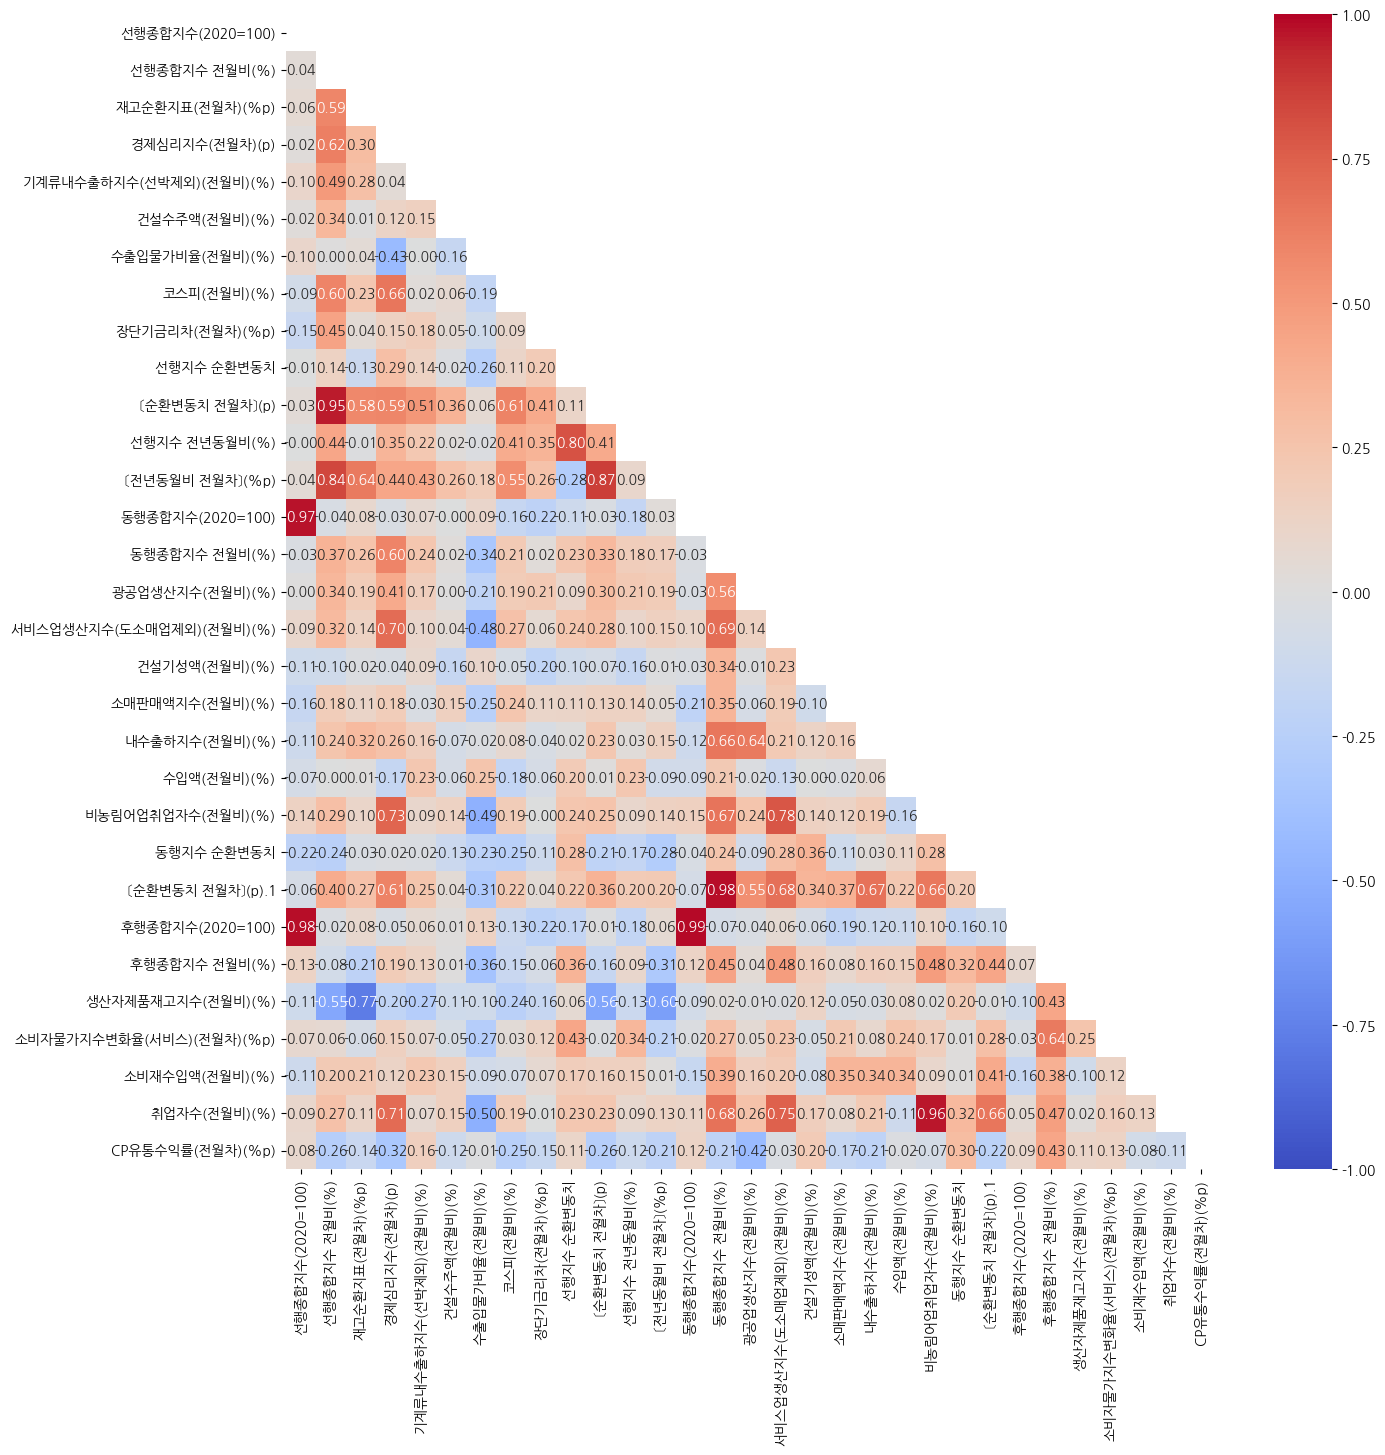

In [21]:
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, mask=mask)

In [22]:
df.columns

Index(['선행종합지수(2020=100)', '선행종합지수 전월비(%)', '재고순환지표(전월차)(%p)',
       '경제심리지수(전월차)(p)', '기계류내수출하지수(선박제외)(전월비)(%)', '건설수주액(전월비)(%)',
       '수출입물가비율(전월비)(%)', '코스피(전월비)(%)', '장단기금리차(전월차)(%p)', '선행지수 순환변동치',
       '〔순환변동치 전월차〕(p)', '선행지수 전년동월비(%)', '〔전년동월비 전월차〕(%p)',
       '동행종합지수(2020=100)', '동행종합지수 전월비(%)', '광공업생산지수(전월비)(%)',
       '서비스업생산지수(도소매업제외)(전월비)(%)', '건설기성액(전월비)(%)', '소매판매액지수(전월비)(%)',
       '내수출하지수(전월비)(%)', '수입액(전월비)(%)', '비농림어업취업자수(전월비)(%)', '동행지수 순환변동치',
       '〔순환변동치 전월차〕(p).1', '후행종합지수(2020=100)', '후행종합지수 전월비(%)',
       '생산자제품재고지수(전월비)(%)', '소비자물가지수변화율(서비스)(전월차)(%p)', '소비재수입액(전월비)(%)',
       '취업자수(전월비)(%)', 'CP유통수익률(전월차)(%p)'],
      dtype='object')

<Axes: xlabel='선행종합지수(2020=100)', ylabel='후행종합지수(2020=100)'>

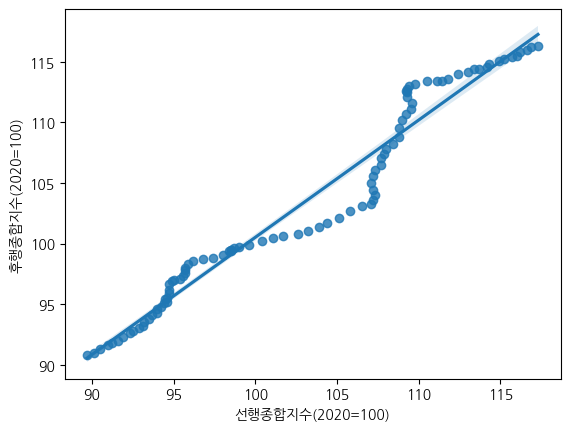

In [24]:
sns.regplot(data=df, x='선행종합지수(2020=100)', y='후행종합지수(2020=100)')

<Axes: xlabel='생산자제품재고지수(전월비)(%)', ylabel='재고순환지표(전월차)(%p)'>

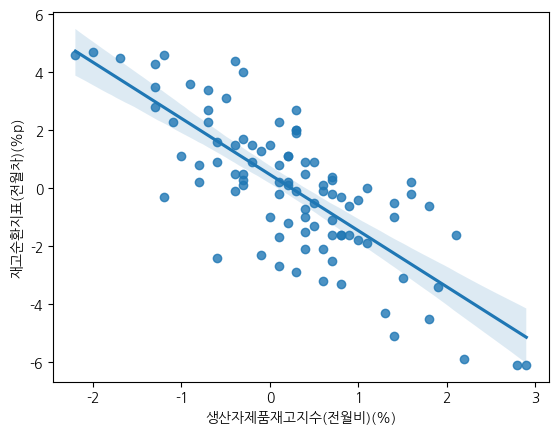

In [25]:
sns.regplot(data=df, x='생산자제품재고지수(전월비)(%)', y='재고순환지표(전월차)(%p)')

In [26]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
선행종합지수(2020=100),95.000000,102.796842,8.156520,89.700000,94.800000,103.200000,109.300000,117.300000
선행종합지수 전월비(%),95.000000,0.288421,0.242708,-0.300000,0.100000,0.300000,0.400000,0.900000
재고순환지표(전월차)(%p),95.000000,-0.014737,2.420039,-6.100000,-1.600000,0.100000,1.500000,4.700000
경제심리지수(전월차)(p),95.000000,-0.025263,2.448880,-12.100000,-0.900000,0.000000,0.950000,6.400000
기계류내수출하지수(선박제외)(전월비)(%),95.000000,-0.015789,1.827992,-4.100000,-1.400000,-0.200000,0.900000,4.400000
건설수주액(전월비)(%),95.000000,0.660000,9.659098,-23.100000,-4.000000,0.900000,5.800000,25.000000
수출입물가비율(전월비)(%),95.000000,-0.113684,0.800081,-2.200000,-0.600000,-0.100000,0.350000,3.400000
코스피(전월비)(%),95.000000,0.285263,2.667853,-5.700000,-1.800000,0.400000,1.900000,9.600000
장단기금리차(전월차)(%p),95.000000,-0.009684,0.116733,-0.390000,-0.075000,0.020000,0.070000,0.250000
선행지수 순환변동치,95.000000,100.371579,1.081436,98.500000,99.500000,100.400000,101.200000,102.800000


In [27]:
col_total = df.filter(like="종합지수").columns
col_total

Index(['선행종합지수(2020=100)', '선행종합지수 전월비(%)', '동행종합지수(2020=100)',
       '동행종합지수 전월비(%)', '후행종합지수(2020=100)', '후행종합지수 전월비(%)'],
      dtype='object')

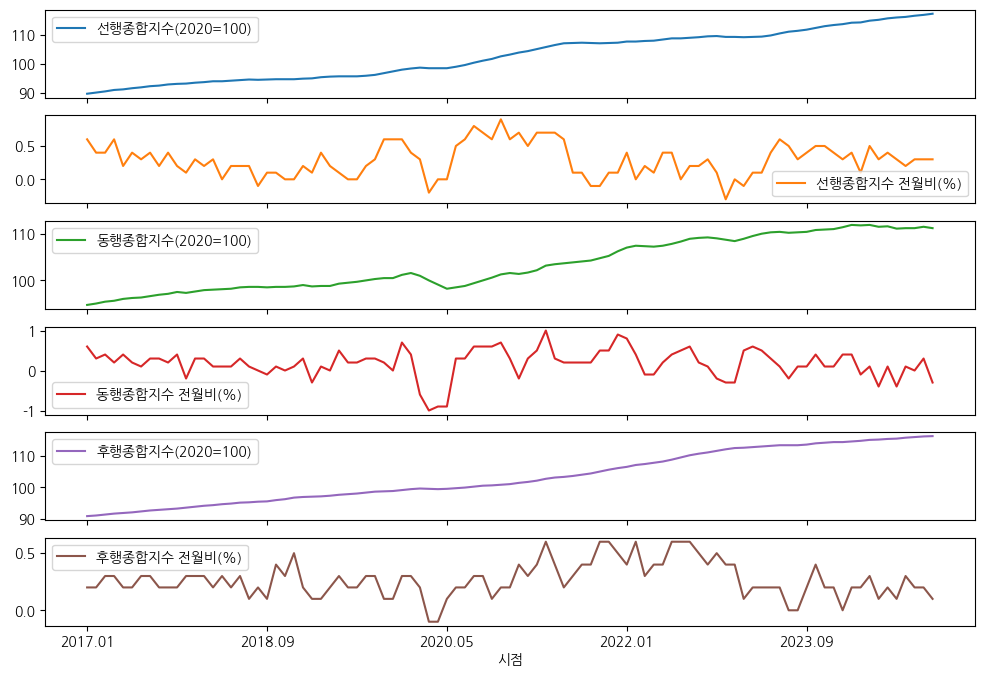

In [29]:
df.filter(like="종합지수").plot(subplots=True, figsize=(12, 8));